In [1]:
from __future__ import print_function


In [2]:
import requests 
from bs4 import BeautifulSoup

In [3]:
r = requests.get('https://www.ergosigorta.com/')

In [4]:
source = BeautifulSoup(r.content,"lxml")
source.title

<title>ERGO Sigorta | Sigortalamak Anlamaktır</title>

In [5]:
import pandas as pd
import numpy as np

In [6]:
data=pd.read_csv(r"C:\Users\1001518\dscience\\SIL_MOTOR_TEST_DATA4.csv",sep=',' ,encoding='latin-1',low_memory=False)


In [7]:
#data=pd.read_csv('C:\\Users\\1001518\\dscience\\TEST_DATA32.csv', encoding='latin-1',na_values={"'"," ",""})

In [8]:
data.head()

,ID,CHASSIS_NUMBER,SIFIR_IKINCIEL,MUAFIYET,CUSTOMER_ID,CUST_GENDER,POLICY_NUMBER,RENEWAL_NUMBER,CUSTOMER_NUMBER,WEB_PRODUCT_CODE,...,NOTPD_H_DOSYA_ADEDI,PERT_ARAC,CALINTI_ARAC,YBO_YEARMO,YBO,T_RENEWED,HSRKAD,HSRADET,ZEYNO,SIRA
0,SB1KZ28E40E09913398658,SB1KZ28E40E099133,Sifir Model,MUAFIYETSIZ,98658,K,10081233,14,98658,344,...,0,0,0,0,0.0,0,10,0.0,0,1
1,U6YJE55188L01266574305,U6YJE55188L012665,2. El Araç,MUAFIYETSIZ,74305,E,12007904,15,74305,344,...,0,0,0,0,0.0,0,10,0.0,0,1
2,NM422300007057019112278,NM422300007057019,Sifir Model,MUAFIYETSIZ,112278,K,12135293,13,112278,344,...,0,0,0,0,0.0,0,10,0.0,0,1
3,WVWZZZAUZJP071917180009,WVWZZZAUZJP071917,Sifir Model,MUAFIYETSIZ,180009,K,12261172,13,180009,344,...,0,0,0,0,0.0,0,8,0.0,0,1
4,VF70B9HPGHE547356219479,VF70B9HPGHE547356,Sifir Model,MUAFIYETSIZ,219479,K,12334015,13,219479,344,...,0,0,0,0,0.0,0,10,0.0,0,1


In [9]:
# optional change renewed to churn
data.loc[data['T_RENEWED']==1,'T_RENEWED']=2
data.loc[data['T_RENEWED']==0,'T_RENEWED']=1
data.loc[data['T_RENEWED']==2,'T_RENEWED']=0
data.shape

(97833, 70)

In [10]:
data=data.drop(['ID','CHASSIS_NUMBER','SIFIR_IKINCIEL','VEH_TYPE_NAME'],axis=1)
data.head()

data.dtypes

MUAFIYET                   object
CUSTOMER_ID                 int64
CUST_GENDER                object
POLICY_NUMBER               int64
RENEWAL_NUMBER              int64
CUSTOMER_NUMBER             int64
WEB_PRODUCT_CODE            int64
CURRENCY                   object
POL_ISSUE_DATE             object
POL_START_DATE             object
POL_END_DATE               object
CANCELLED_YES               int64
PAYMENT_TYPE               object
NUM_INSTALLMENT           float64
PRIVATE_CORPORATE          object
CUSTOMER_DOB_YEAR         float64
GENDER                     object
MARITAL_STATUS             object
BONUS_MALUS                object
BONUS_MALUS_PROTECTION    float64
AGENCY_CODE                 int64
AGENCY_REGION_CODE          int64
PLATE_1                     int64
PLATE_2                    object
PLATE_3                    object
W_CUSTOMER_DEF             object
NEW_RENEWAL                object
CHANNEL                    object
NO_OF_CLMS_LAST_YEAR      float64
VEHICLE_MAKE  

In [11]:
#print(s.replace('a', ''))
#print(s.translate({ord('a'): None}))
#data['POL_ISSUE_DATE'].head()
#x=data['POL_ISSUE_DATE'].replace(":00:00:00","",regex=True)
#import datetime
#y=pd.to_datetime(x, format='%d%b%Y') 
#print(y.head())
#print(y.dtypes)
# 18APR2019:00:00:00 
#pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
#efficient way to extract year from string format date
#z = pd.DatetimeIndex(y).year
#print(z)
#m = pd.DatetimeIndex(y).month
#print(m)
#t=z*100+m
#print(t)
import datetime

to_yearmo=['POL_ISSUE_DATE','POL_START_DATE','POL_END_DATE']
data[to_yearmo]=data[to_yearmo].replace(":00:00:00","",regex=True)
data[to_yearmo]=pd.to_datetime(data[to_yearmo].stack(),format='%d%b%Y').unstack() 

In [12]:
to_yearmo_l=['POL_ISSUE_YEARMO','POL_START_YEARMO','POL_END_YEARMO']
z=len(to_yearmo)

for i in range(z):
    t=data[to_yearmo].columns[i]
    year=pd.DatetimeIndex(data[t]).year
    month=pd.DatetimeIndex(data[t]).month
    data[to_yearmo_l[i]]=year*100+month

    
data=data.drop(['POL_ISSUE_DATE','POL_START_DATE','POL_END_DATE','ZEYNO','SIRA','PLATE_2','PLATE_3','PRODUCT_PLACE','WEB_PRODUCT_CODE','CURRENCY','PRIVATE_CORPORATE','GENDER','W_CUSTOMER_DEF'],axis=1)

In [13]:
data.head()



,MUAFIYET,CUSTOMER_ID,CUST_GENDER,POLICY_NUMBER,RENEWAL_NUMBER,CUSTOMER_NUMBER,CANCELLED_YES,PAYMENT_TYPE,NUM_INSTALLMENT,CUSTOMER_DOB_YEAR,...,PERT_ARAC,CALINTI_ARAC,YBO_YEARMO,YBO,T_RENEWED,HSRKAD,HSRADET,POL_ISSUE_YEARMO,POL_START_YEARMO,POL_END_YEARMO
0,MUAFIYETSIZ,98658,K,10081233,14,98658,0,Taksitli,7.0,1949.0,...,0,0,0,0.0,1,10,0.0,201812,201812,201912
1,MUAFIYETSIZ,74305,E,12007904,15,74305,0,Taksitli,6.0,1960.0,...,0,0,0,0.0,1,10,0.0,201903,201903,202003
2,MUAFIYETSIZ,112278,K,12135293,13,112278,0,Taksitli,9.0,1976.0,...,0,0,0,0.0,1,10,0.0,201809,201809,201909
3,MUAFIYETSIZ,180009,K,12261172,13,180009,0,Pesin,1.0,1960.0,...,0,0,0,0.0,1,8,0.0,201901,201901,202001
4,MUAFIYETSIZ,219479,K,12334015,13,219479,0,Taksitli,7.0,1971.0,...,0,0,0,0.0,1,10,0.0,201904,201904,202004


In [14]:
data.pivot_table(values=['T_RENEWED'],index=['POL_ISSUE_YEARMO'],aggfunc=lambda x: sum(x))

,T_RENEWED
POL_ISSUE_YEARMO,
201709,1566
201710,1606
201711,1875
201712,2395
201801,1760
201802,1629
201803,2577
201804,2446
201805,2188


In [15]:
#def num_missing(x):
#    return [sum(x.isnull()),round(sum(x.isnull())/len(x),3)]

#data.apply(num_missing,axis=0)

#percent_missing = data.isnull().sum() * 100 / len(data)
#missing_value_df = pd.DataFrame({'column_name': data.columns,
#                                 'percent_missing': percent_missing})

#print(missing_value_df)

#data = data.loc[:, data.isin([' ','NULL',0]).mean() < 0.06]


##sum(data.isnull()),round(sum(data.isnull())/len(data),3)

#print(data.isnull().sum() * 100 / len(data))


#print(data.isin([' ','NULL',0]).sum() * 100 / len(data))
data=data.loc[data['POL_ISSUE_YEARMO']<201806]

data=data.loc[data['CANCELLED_YES']==0]




In [16]:
data.isnull().sum() / len(data)

MUAFIYET                  0.000000
CUSTOMER_ID               0.000000
CUST_GENDER               0.000000
POLICY_NUMBER             0.000000
RENEWAL_NUMBER            0.000000
CUSTOMER_NUMBER           0.000000
CANCELLED_YES             0.000000
PAYMENT_TYPE              0.000000
NUM_INSTALLMENT           0.042863
CUSTOMER_DOB_YEAR         0.000047
MARITAL_STATUS            0.000141
BONUS_MALUS               1.000000
BONUS_MALUS_PROTECTION    1.000000
AGENCY_CODE               0.000000
AGENCY_REGION_CODE        0.000000
PLATE_1                   0.000000
NEW_RENEWAL               0.000000
CHANNEL                   0.000000
NO_OF_CLMS_LAST_YEAR      0.157453
VEHICLE_MAKE              0.005420
VEHICLE_YEAR              0.000000
NUM_SEATS                 0.000000
ENGINE_SIZE               0.001013
HP                        0.013078
CCM                       0.013526
BODY_CODE                 0.043829
DOORS                     0.045784
FUEL_TYPE                 0.043829
LOA_WEIGHT          

In [17]:
data.isnull().mean()

null_val=data[pd.Series(data.loc[:, data.isnull().mean() > 0].columns)]

null_val.isnull().mean()

NUM_INSTALLMENT           0.042863
CUSTOMER_DOB_YEAR         0.000047
MARITAL_STATUS            0.000141
BONUS_MALUS               1.000000
BONUS_MALUS_PROTECTION    1.000000
NO_OF_CLMS_LAST_YEAR      0.157453
VEHICLE_MAKE              0.005420
ENGINE_SIZE               0.001013
HP                        0.013078
CCM                       0.013526
BODY_CODE                 0.043829
DOORS                     0.045784
FUEL_TYPE                 0.043829
LOA_WEIGHT                0.045784
ENGINE_TYPE               0.045455
CYLINDERS                 0.045784
TORQUE                    0.045784
WHEELBASE                 0.045784
HSRADET                   0.157453
dtype: float64

In [18]:
data['HSRADET']=data['HSRADET'].fillna(0)


null_val=data[pd.Series(data.loc[:, data.isnull().mean() < .05].columns)]

In [19]:
null_val.isnull().mean()

MUAFIYET               0.000000
CUSTOMER_ID            0.000000
CUST_GENDER            0.000000
POLICY_NUMBER          0.000000
RENEWAL_NUMBER         0.000000
CUSTOMER_NUMBER        0.000000
CANCELLED_YES          0.000000
PAYMENT_TYPE           0.000000
NUM_INSTALLMENT        0.042863
CUSTOMER_DOB_YEAR      0.000047
MARITAL_STATUS         0.000141
AGENCY_CODE            0.000000
AGENCY_REGION_CODE     0.000000
PLATE_1                0.000000
NEW_RENEWAL            0.000000
CHANNEL                0.000000
VEHICLE_MAKE           0.005420
VEHICLE_YEAR           0.000000
NUM_SEATS              0.000000
ENGINE_SIZE            0.001013
HP                     0.013078
CCM                    0.013526
BODY_CODE              0.043829
DOORS                  0.045784
FUEL_TYPE              0.043829
LOA_WEIGHT             0.045784
ENGINE_TYPE            0.045455
CYLINDERS              0.045784
TORQUE                 0.045784
WHEELBASE              0.045784
TOT_GWP                0.000000
TOT_COM 

In [20]:
data=data[null_val.columns]

In [21]:
data.isnull().mean()


MUAFIYET               0.000000
CUSTOMER_ID            0.000000
CUST_GENDER            0.000000
POLICY_NUMBER          0.000000
RENEWAL_NUMBER         0.000000
CUSTOMER_NUMBER        0.000000
CANCELLED_YES          0.000000
PAYMENT_TYPE           0.000000
NUM_INSTALLMENT        0.042863
CUSTOMER_DOB_YEAR      0.000047
MARITAL_STATUS         0.000141
AGENCY_CODE            0.000000
AGENCY_REGION_CODE     0.000000
PLATE_1                0.000000
NEW_RENEWAL            0.000000
CHANNEL                0.000000
VEHICLE_MAKE           0.005420
VEHICLE_YEAR           0.000000
NUM_SEATS              0.000000
ENGINE_SIZE            0.001013
HP                     0.013078
CCM                    0.013526
BODY_CODE              0.043829
DOORS                  0.045784
FUEL_TYPE              0.043829
LOA_WEIGHT             0.045784
ENGINE_TYPE            0.045455
CYLINDERS              0.045784
TORQUE                 0.045784
WHEELBASE              0.045784
TOT_GWP                0.000000
TOT_COM 

In [22]:
data.shape

(42438, 53)

In [23]:
print(data['F_DOLU_HASARI'].value_counts(dropna = False).sort_index())

0    42334
1      104
Name: F_DOLU_HASARI, dtype: int64


In [24]:
#MUAFIYETLI       107
#MUAFIYETSIZ    97726

#CUST_GENDER 
#E    71482
#K    26351

#PAYMENT_TYPE
#Pesin       14697
#Taksitli    83136

#0    88254
#1     9579
#Name: CANCELLED_YES

#Name: NUM_INSTALLMENT
 #1.0     14697
 #2.0      1056
 #3.0      1838
 #4.0      1935
 #5.0      2439
 #6.0      9235
 #7.0     37132
 #8.0       922
 #9.0     25214
 #10.0       68
#NaN       3297


#NaN         70
#Name: CUSTOMER_DOB_YEAR



#B      15827
#E      81924
#n          3
#NaN       79
#Name: MARITAL_STATUS



#2     4819
#3     3328
#4      922
#5     8848
#6     3224
#7      946
#9     5048
#10    1795
#12    6882
#13    1886
#14    2284
#16    2449
#17       7
#Name: AGENCY_REGION_CODE

In [25]:
data['CUST_AGE']=round(data['POL_END_YEARMO']/100,0)-data['CUSTOMER_DOB_YEAR']

In [26]:
data['CUST_AGE'].describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,.99])

count    42436.000000
mean        50.208102
std         11.501941
min          2.000000
1%          30.000000
5%          34.000000
10%         37.000000
25%         41.000000
50%         49.000000
75%         58.000000
90%         66.000000
95%         70.000000
99%         80.000000
max        102.000000
Name: CUST_AGE, dtype: float64

In [27]:
data['CUST_AGE']= [max(min(x, 80), 18) for x in data['CUST_AGE']]

In [28]:
data['CUST_AGE'].describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,.99])

count    42436.000000
mean        50.171505
std         11.264729
min         18.000000
1%          30.000000
5%          34.000000
10%         37.000000
25%         41.000000
50%         49.000000
75%         58.000000
90%         66.000000
95%         70.000000
99%         80.000000
max         80.000000
Name: CUST_AGE, dtype: float64

In [29]:
data.head()

,MUAFIYET,CUSTOMER_ID,CUST_GENDER,POLICY_NUMBER,RENEWAL_NUMBER,CUSTOMER_NUMBER,CANCELLED_YES,PAYMENT_TYPE,NUM_INSTALLMENT,CUSTOMER_DOB_YEAR,...,CALINTI_ARAC,YBO_YEARMO,YBO,T_RENEWED,HSRKAD,HSRADET,POL_ISSUE_YEARMO,POL_START_YEARMO,POL_END_YEARMO,CUST_AGE
6,MUAFIYETSIZ,150248,E,12379152,12,150248,0,Taksitli,7.0,1967.0,...,0,201904,1.00,0,10,0.0,201804,201804,201904,52.0
9,MUAFIYETSIZ,169014,E,12692565,12,169014,0,Taksitli,7.0,1959.0,...,0,201905,0.65,0,8,1.0,201805,201805,201905,60.0
11,MUAFIYETSIZ,413900,E,13229367,11,413900,0,Taksitli,7.0,1968.0,...,0,201809,0.83,0,10,0.0,201709,201709,201809,50.0
17,MUAFIYETSIZ,169070,E,14076819,11,169070,0,Taksitli,7.0,1956.0,...,0,201902,1.00,0,10,0.0,201802,201802,201902,63.0
28,MUAFIYETSIZ,3263701,E,17829986,9,3263701,0,Taksitli,7.0,1975.0,...,0,201905,0.73,1,9,0.0,201805,201805,201905,44.0


In [30]:
data.loc[data['MARITAL_STATUS']=='n','MARITAL_STATUS']=None

In [31]:
data['MARITAL_STATUS'].value_counts(dropna = False).sort_index()

B       6982
E      35448
NaN        8
Name: MARITAL_STATUS, dtype: int64

In [32]:
data['AGENCY_REGION_CODE'].value_counts(dropna = False).sort_index()

2     4819
3     3328
4      922
5     8848
6     3224
7      946
9     5048
10    1795
12    6882
13    1886
14    2284
16    2449
17       7
Name: AGENCY_REGION_CODE, dtype: int64

In [33]:
pd.set_option('display.max_rows', 100)

In [34]:
data['CANCELLED_YES'].value_counts(dropna = False).sort_index()


0    42438
Name: CANCELLED_YES, dtype: int64

In [35]:
data['VEHICLE_MAKE'].replace(to_replace=['FORD/OTOSAN','FORD /USA'],value='FORD', inplace=True)
data['VEHICLE_MAKE'].replace(to_replace=['PEUGEOT (KARSAN)'],value='PEUGEOT', inplace=True)
data['VEHICLE_MAKE'].replace(to_replace=['RENAULT (OYAK)'],value='RENAULT', inplace=True)
data['VEHICLE_MAKE'].replace(to_replace=['ROLLS-ROYCE/BENTLEY'],value='BENTLEY', inplace=True)
data['VEHICLE_MAKE'].replace(to_replace=['DODGE/USA'],value='DODGE', inplace=True)
data['VEHICLE_MAKE'].replace(to_replace=['TOFAS-FIAT'],value='FIAT', inplace=True)


data['ENGINE_TYPE'].replace(to_replace=['DIES'],value='D',inplace=True)
data['ENGINE_TYPE'].replace(to_replace=['HIBR','HYBR'],value='H',inplace=True)
data['ENGINE_TYPE'].replace(to_replace=['OTTO'],value='O',inplace=True)

In [36]:
data['VEHICLE_MAKE'].value_counts(dropna = False).sort_index()

#data.shape
#(42438, 54)

ALFA ROMEO       92
AUDI            415
BENTLEY           3
BMW             945
BUICK             1
CADILLAC          2
CHERY             7
CHEVROLET       260
CHRYSLER        207
CITROEN         964
DACIA          1870
DAIHATSU         26
DODGE             3
FERRARI           7
FIAT           1868
FORD           2319
GAZ              16
GEELY            33
GMC               1
HONDA          1960
HYUNDAI        3067
IKCO              1
INFINITI          7
INTER             1
JAGUAR            7
JEEP              1
KIA            1187
LADA              9
LANCIA           26
LAND ROVER       33
LINCOLN           3
MASERATI          7
MAZDA           167
MERCEDES        736
MINI            188
MITSUBISHI      186
MOTORSIKLET      25
NISSAN         2987
OPEL           4625
PEUGEOT        1206
PORSCHE          70
RANGE ROVER      31
RENAULT        4759
ROVER             2
SAAB              4
SEAT            222
SKODA           957
SMART             3
SSANGYONG        51
SUBARU          132


In [37]:
data=data.loc[data['VEHICLE_MAKE']!='MOTORSIKLET']
#data.shape
#(42413, 54)


In [38]:
data['VEHICLE_MAKE'].replace(to_replace=
['CHEVROLET',
'SEAT',
'CHRYSLER',
'MINI',
'MITSUBISHI',
'MAZDA',
'SUBARU',
'ALFA ROMEO',
'PORSCHE',
'SSANGYONG',
'GEELY',
'LAND ROVER',
'RANGE ROVER',
'DAIHATSU',
'LANCIA',
'GAZ',
'LADA',
'CHERY',
'FERRARI',
'INFINITI',
'JAGUAR',
'MASERATI',
'TATA',
'SAAB',
'BENTLEY',
'DODGE',
'LINCOLN',
'SMART',
'CADILLAC',
'ROVER',
'BUICK',
'GMC',
'IKCO',
'INTER',
'JEEP'
],value='OTHER', inplace=True)


In [39]:
pd.set_option('display.max_columns', 60)

data.head()

,MUAFIYET,CUSTOMER_ID,CUST_GENDER,POLICY_NUMBER,RENEWAL_NUMBER,CUSTOMER_NUMBER,CANCELLED_YES,PAYMENT_TYPE,NUM_INSTALLMENT,CUSTOMER_DOB_YEAR,MARITAL_STATUS,AGENCY_CODE,AGENCY_REGION_CODE,PLATE_1,NEW_RENEWAL,CHANNEL,VEHICLE_MAKE,VEHICLE_YEAR,NUM_SEATS,ENGINE_SIZE,HP,CCM,BODY_CODE,DOORS,FUEL_TYPE,LOA_WEIGHT,ENGINE_TYPE,CYLINDERS,TORQUE,WHEELBASE,TOT_GWP,TOT_COM,F_DOLU_HASARI,F_ARAC_CALINMA,F_BEDENI_HASAR,F_OLUMLU_KAZA,F_DAVALI_MI,TOT_MUALLAK_HASAR,TOT_ODENEN_HASAR,TOT_POLICE_HASAR,H_DOSYA_ADEDI,AVG_H_DOSYA_GUN,NOTPD_H_DOSYA_ADEDI,PERT_ARAC,CALINTI_ARAC,YBO_YEARMO,YBO,T_RENEWED,HSRKAD,HSRADET,POL_ISSUE_YEARMO,POL_START_YEARMO,POL_END_YEARMO,CUST_AGE
6,MUAFIYETSIZ,150248,E,12379152,12,150248,0,Taksitli,7.0,1967.0,E,9419,5,6,Renewal,PROFESYONELACN,DACIA,2012,5,1461.0,109.0,1461.0,STW,5.0,D,1294.0,D,4.0,240.0,2673.0,619.39,106.23,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0,0,201904,1.00,0,10,0.0,201804,201804,201904,52.0
9,MUAFIYETSIZ,169014,E,12692565,12,169014,0,Taksitli,7.0,1959.0,E,1648,9,34,Renewal,PROFESYONELACN,NISSAN,2016,5,1598.0,131.0,1598.0,STW,5.0,D,1461.0,D,4.0,320.0,2646.0,1350.39,221.65,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0,0,201905,0.65,0,8,1.0,201805,201805,201905,60.0
11,MUAFIYETSIZ,413900,E,13229367,11,413900,0,Taksitli,7.0,1968.0,E,9175,5,34,Renewal,PROFESYONELACN,OTHER,2003,4,4511.0,450.0,4511.0,STW,5.0,O,2355.0,O,8.0,620.0,2855.0,2755.41,425.48,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0,0,201809,0.83,0,10,0.0,201709,201709,201809,50.0
17,MUAFIYETSIZ,169070,E,14076819,11,169070,0,Taksitli,7.0,1956.0,E,5055,9,34,Renewal,PROFESYONELACN,OTHER,2009,5,2720.0,190.0,2720.0,STW,5.0,D,2455.0,D,6.0,445.0,2745.0,1599.25,246.54,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0,0,201902,1.00,0,10,0.0,201802,201802,201902,63.0
28,MUAFIYETSIZ,3263701,E,17829986,9,3263701,0,Taksitli,7.0,1975.0,E,5146,14,34,Renewal,PROFESYONELACN,TOYOTA,2009,5,1364.0,90.0,1364.0,SED,4.0,D,1288.0,D,4.0,190.0,2600.0,749.33,123.14,0,0,0,0,0,2200.0,0.0,2200.0,2,99999.0,2,0,0,201905,0.73,1,9,0.0,201805,201805,201905,44.0


In [40]:
data['VEHICLE_AGE']=round(data['POL_END_YEARMO']/100,0)-data['VEHICLE_YEAR']

In [41]:
data.loc[data['NUM_SEATS']<=5,'NUM_SEATS_LT5']=1

In [42]:
data.loc[data['NUM_SEATS_LT5']!=1,'NUM_SEATS_LT5']=0

In [43]:
data.groupby("NUM_SEATS_LT5")['NUM_SEATS'].describe().reset_index()

,NUM_SEATS_LT5,count,mean,std,min,25%,50%,75%,max
0,0.0,1137.0,7.273527,0.733944,6.0,7.0,7.0,7.0,15.0
1,1.0,41276.0,4.984107,0.175520,0.0,5.0,5.0,5.0,5.0


In [44]:
data['CCM'].describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,.99])
#NULL VALUE
#ENGINE_SIZE            0.001014
#HP                     0.013086
#CCM                    0.013534

count    41839.000000
mean      1485.705084
std        394.251822
min          0.000000
1%           0.000000
5%        1197.000000
10%       1248.000000
25%       1390.000000
50%       1560.000000
75%       1598.000000
90%       1598.000000
95%       1991.000000
99%       2687.000000
max       9999.000000
Name: CCM, dtype: float64

In [45]:
data.dtypes

MUAFIYET                object
CUSTOMER_ID              int64
CUST_GENDER             object
POLICY_NUMBER            int64
RENEWAL_NUMBER           int64
CUSTOMER_NUMBER          int64
CANCELLED_YES            int64
PAYMENT_TYPE            object
NUM_INSTALLMENT        float64
CUSTOMER_DOB_YEAR      float64
MARITAL_STATUS          object
AGENCY_CODE              int64
AGENCY_REGION_CODE       int64
PLATE_1                  int64
NEW_RENEWAL             object
CHANNEL                 object
VEHICLE_MAKE            object
VEHICLE_YEAR             int64
NUM_SEATS                int64
ENGINE_SIZE            float64
HP                     float64
CCM                    float64
BODY_CODE               object
DOORS                  float64
FUEL_TYPE               object
LOA_WEIGHT             float64
ENGINE_TYPE             object
CYLINDERS              float64
TORQUE                 float64
WHEELBASE              float64
TOT_GWP                float64
TOT_COM                float64
F_DOLU_H

In [46]:

data['BODY_CODE'].replace(to_replace=['CPE','UNW','CVA','MIN','CAB','ROA','YCA','PAN','TEN','ÇKT','ÇKU','CKU','EYP','SUV'],value='OTH', inplace=True)
data=data.drop(['NUM_SEATS'],axis=1)

data.loc[data['DOORS']<4,'DOORS_CAT']='DOORS_LT4'
data.loc[data['DOORS']==4,'DOORS_CAT']='DOORS_EQ4'
##data.loc[data['DOORS']==5,'DOORS_CAT']='DOORS_EQ5'
data.loc[data['DOORS']>=5,'DOORS_CAT']='DOORS_GE5'

data.loc[data['HSRKAD']<0,'HSRKAD']=0

data=data.drop(['DOORS'],axis=1)

In [47]:

print(data['DOORS_CAT'].value_counts(dropna = False).sort_index())

DOORS_EQ4    14477
DOORS_GE5    25341
DOORS_LT4      652
NaN           1943
Name: DOORS_CAT, dtype: int64


In [48]:
print(data['FUEL_TYPE'].value_counts(dropna=False).sort_values(ascending=False))

data['FUEL_TYPE'].replace(to_replace=['U','H'],value='Other',inplace=True)

print(data['FUEL_TYPE'].value_counts(dropna=False).sort_values(ascending=False))

D      21100
O      19370
NaN     1860
U         69
H         14
Name: FUEL_TYPE, dtype: int64
D        21100
O        19370
NaN       1860
Other       83
Name: FUEL_TYPE, dtype: int64


In [49]:
data.head()

,MUAFIYET,CUSTOMER_ID,CUST_GENDER,POLICY_NUMBER,RENEWAL_NUMBER,CUSTOMER_NUMBER,CANCELLED_YES,PAYMENT_TYPE,NUM_INSTALLMENT,CUSTOMER_DOB_YEAR,MARITAL_STATUS,AGENCY_CODE,AGENCY_REGION_CODE,PLATE_1,NEW_RENEWAL,CHANNEL,VEHICLE_MAKE,VEHICLE_YEAR,ENGINE_SIZE,HP,CCM,BODY_CODE,FUEL_TYPE,LOA_WEIGHT,ENGINE_TYPE,CYLINDERS,TORQUE,WHEELBASE,TOT_GWP,TOT_COM,F_DOLU_HASARI,F_ARAC_CALINMA,F_BEDENI_HASAR,F_OLUMLU_KAZA,F_DAVALI_MI,TOT_MUALLAK_HASAR,TOT_ODENEN_HASAR,TOT_POLICE_HASAR,H_DOSYA_ADEDI,AVG_H_DOSYA_GUN,NOTPD_H_DOSYA_ADEDI,PERT_ARAC,CALINTI_ARAC,YBO_YEARMO,YBO,T_RENEWED,HSRKAD,HSRADET,POL_ISSUE_YEARMO,POL_START_YEARMO,POL_END_YEARMO,CUST_AGE,VEHICLE_AGE,NUM_SEATS_LT5,DOORS_CAT
6,MUAFIYETSIZ,150248,E,12379152,12,150248,0,Taksitli,7.0,1967.0,E,9419,5,6,Renewal,PROFESYONELACN,DACIA,2012,1461.0,109.0,1461.0,STW,D,1294.0,D,4.0,240.0,2673.0,619.39,106.23,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0,0,201904,1.00,0,10,0.0,201804,201804,201904,52.0,7.0,1.0,DOORS_GE5
9,MUAFIYETSIZ,169014,E,12692565,12,169014,0,Taksitli,7.0,1959.0,E,1648,9,34,Renewal,PROFESYONELACN,NISSAN,2016,1598.0,131.0,1598.0,STW,D,1461.0,D,4.0,320.0,2646.0,1350.39,221.65,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0,0,201905,0.65,0,8,1.0,201805,201805,201905,60.0,3.0,1.0,DOORS_GE5
11,MUAFIYETSIZ,413900,E,13229367,11,413900,0,Taksitli,7.0,1968.0,E,9175,5,34,Renewal,PROFESYONELACN,OTHER,2003,4511.0,450.0,4511.0,STW,O,2355.0,O,8.0,620.0,2855.0,2755.41,425.48,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0,0,201809,0.83,0,10,0.0,201709,201709,201809,50.0,15.0,1.0,DOORS_GE5
17,MUAFIYETSIZ,169070,E,14076819,11,169070,0,Taksitli,7.0,1956.0,E,5055,9,34,Renewal,PROFESYONELACN,OTHER,2009,2720.0,190.0,2720.0,STW,D,2455.0,D,6.0,445.0,2745.0,1599.25,246.54,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0,0,201902,1.00,0,10,0.0,201802,201802,201902,63.0,10.0,1.0,DOORS_GE5
28,MUAFIYETSIZ,3263701,E,17829986,9,3263701,0,Taksitli,7.0,1975.0,E,5146,14,34,Renewal,PROFESYONELACN,TOYOTA,2009,1364.0,90.0,1364.0,SED,D,1288.0,D,4.0,190.0,2600.0,749.33,123.14,0,0,0,0,0,2200.0,0.0,2200.0,2,99999.0,2,0,0,201905,0.73,1,9,0.0,201805,201805,201905,44.0,10.0,1.0,DOORS_EQ4


In [50]:
data['AGENCY_REGION_CODE']=str(data['AGENCY_REGION_CODE'])
data['PLATE_1']=str(data['PLATE_1'])


In [51]:
data.dtypes

MUAFIYET                object
CUSTOMER_ID              int64
CUST_GENDER             object
POLICY_NUMBER            int64
RENEWAL_NUMBER           int64
CUSTOMER_NUMBER          int64
CANCELLED_YES            int64
PAYMENT_TYPE            object
NUM_INSTALLMENT        float64
CUSTOMER_DOB_YEAR      float64
MARITAL_STATUS          object
AGENCY_CODE              int64
AGENCY_REGION_CODE      object
PLATE_1                 object
NEW_RENEWAL             object
CHANNEL                 object
VEHICLE_MAKE            object
VEHICLE_YEAR             int64
ENGINE_SIZE            float64
HP                     float64
CCM                    float64
BODY_CODE               object
FUEL_TYPE               object
LOA_WEIGHT             float64
ENGINE_TYPE             object
CYLINDERS              float64
TORQUE                 float64
WHEELBASE              float64
TOT_GWP                float64
TOT_COM                float64
F_DOLU_HASARI            int64
F_ARAC_CALINMA           int64
F_BEDENI

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder



In [53]:
TRAIN=data.loc[data['POL_ISSUE_YEARMO']<201805]
TEST=data.loc[data['POL_ISSUE_YEARMO']==201805]
TRAIN=TRAIN.loc[data['PERT_ARAC']==0]
TEST=TEST.loc[data['PERT_ARAC']==0]

TRAIN_Y=TRAIN['T_RENEWED']
TRAIN_X=TRAIN[['NUM_INSTALLMENT',
'ENGINE_SIZE',
'HP',
'CCM',
'LOA_WEIGHT',
'CYLINDERS',
'TORQUE',
'WHEELBASE',
'TOT_GWP',
'TOT_COM',
'TOT_MUALLAK_HASAR',
'TOT_ODENEN_HASAR',
'TOT_POLICE_HASAR',
'AVG_H_DOSYA_GUN',
'YBO',
'CUST_AGE',
'VEHICLE_AGE',
'NUM_SEATS_LT5',
'AGENCY_REGION_CODE',
'PLATE_1',
'F_DOLU_HASARI',
'F_ARAC_CALINMA',
'F_BEDENI_HASAR',
'F_OLUMLU_KAZA',
'F_DAVALI_MI',
'H_DOSYA_ADEDI',
'NOTPD_H_DOSYA_ADEDI',
'PERT_ARAC',
'CALINTI_ARAC',
'HSRKAD',
'MUAFIYET',
'CUST_GENDER',
'PAYMENT_TYPE',
'MARITAL_STATUS',
'NEW_RENEWAL',
'CHANNEL',
'VEHICLE_MAKE',
'BODY_CODE',
'FUEL_TYPE',
'ENGINE_TYPE',
'DOORS_CAT']]



TEST_Y=TEST['T_RENEWED']
TEST_X=TEST[['NUM_INSTALLMENT',
'ENGINE_SIZE',
'HP',
'CCM',
'LOA_WEIGHT',
'CYLINDERS',
'TORQUE',
'WHEELBASE',
'TOT_GWP',
'TOT_COM',
'TOT_MUALLAK_HASAR',
'TOT_ODENEN_HASAR',
'TOT_POLICE_HASAR',
'AVG_H_DOSYA_GUN',
'YBO',
'CUST_AGE',
'VEHICLE_AGE',
'NUM_SEATS_LT5',
'AGENCY_REGION_CODE',
'PLATE_1',
'F_DOLU_HASARI',
'F_ARAC_CALINMA',
'F_BEDENI_HASAR',
'F_OLUMLU_KAZA',
'F_DAVALI_MI',
'H_DOSYA_ADEDI',
'NOTPD_H_DOSYA_ADEDI',
'PERT_ARAC',
'CALINTI_ARAC',
'HSRKAD',
'MUAFIYET',
'CUST_GENDER',
'PAYMENT_TYPE',
'MARITAL_STATUS',
'NEW_RENEWAL',
'CHANNEL',
'VEHICLE_MAKE',
'BODY_CODE',
'FUEL_TYPE',
'ENGINE_TYPE',
'DOORS_CAT']]



In [54]:
#numeric_transformer=Pipeline(steps=[('imputer',Imputer(strategy='median')),('scaler',StandardScaler())])
#categorical_transformer=Pipeline(steps=[('imputer',Imputer(strategy='constant',missing_values='NaN')),('onehot',OneHotEncoder(handle_unknown='ignore'))])

In [55]:
numeric_features=TRAIN_X.select_dtypes(include=['int64','float64']).columns
categorical_features=TRAIN_X.select_dtypes(include=['object']).columns

In [56]:
#means=[]
#for i in pd.Series(numeric_features):
 #   means=([TRAIN_X[i].mean()])
#    TEST_X.loc[TEST_X.isnull()]


num_fet[0:]

In [57]:
#for i in pd.Series(numeric_features):   
#    print(i,TRAIN_X[i].mean())
#fillnull=TRAIN_X['NUM_INSTALLMENT'].mean()
#fillnull
#6.2515349463119234
#TEST_X.loc[TEST_X['NUM_INSTALLMENT'].isnull()]
#TEST_X['NUM_INSTALLMENT'].fillna(value=fillnull),
#TEST_X.loc[4659]
#TEST_X.loc[4667]
#for engine size
#TRAIN_X.loc[8640] 
# 1476.1553398058252


In [58]:
for i in pd.Series(numeric_features):   
    fillnull=TRAIN_X[i].mean()
    TEST_X[i].fillna(fillnull,inplace=True)


for i in pd.Series(numeric_features):   
    fillnull=TRAIN_X[i].mean()
    TRAIN_X[i].fillna(fillnull,inplace=True)
    
import statistics   

for i in pd.Series(categorical_features):   
    res = statistics.mode(TRAIN_X[i]) 
    TEST_X[i].fillna(res,inplace=True)
    

for i in pd.Series(categorical_features):   
    res = statistics.mode(TRAIN_X[i]) 
    TRAIN_X[i].fillna(res,inplace=True)

C:\Users\1001518\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [59]:
TEST_X.isnull().mean()

NUM_INSTALLMENT        0.0
ENGINE_SIZE            0.0
HP                     0.0
CCM                    0.0
LOA_WEIGHT             0.0
CYLINDERS              0.0
TORQUE                 0.0
WHEELBASE              0.0
TOT_GWP                0.0
TOT_COM                0.0
TOT_MUALLAK_HASAR      0.0
TOT_ODENEN_HASAR       0.0
TOT_POLICE_HASAR       0.0
AVG_H_DOSYA_GUN        0.0
YBO                    0.0
CUST_AGE               0.0
VEHICLE_AGE            0.0
NUM_SEATS_LT5          0.0
AGENCY_REGION_CODE     0.0
PLATE_1                0.0
F_DOLU_HASARI          0.0
F_ARAC_CALINMA         0.0
F_BEDENI_HASAR         0.0
F_OLUMLU_KAZA          0.0
F_DAVALI_MI            0.0
H_DOSYA_ADEDI          0.0
NOTPD_H_DOSYA_ADEDI    0.0
PERT_ARAC              0.0
CALINTI_ARAC           0.0
HSRKAD                 0.0
MUAFIYET               0.0
CUST_GENDER            0.0
PAYMENT_TYPE           0.0
MARITAL_STATUS         0.0
NEW_RENEWAL            0.0
CHANNEL                0.0
VEHICLE_MAKE           0.0
B

In [60]:
TRAIN_X.isnull().mean()

NUM_INSTALLMENT        0.0
ENGINE_SIZE            0.0
HP                     0.0
CCM                    0.0
LOA_WEIGHT             0.0
CYLINDERS              0.0
TORQUE                 0.0
WHEELBASE              0.0
TOT_GWP                0.0
TOT_COM                0.0
TOT_MUALLAK_HASAR      0.0
TOT_ODENEN_HASAR       0.0
TOT_POLICE_HASAR       0.0
AVG_H_DOSYA_GUN        0.0
YBO                    0.0
CUST_AGE               0.0
VEHICLE_AGE            0.0
NUM_SEATS_LT5          0.0
AGENCY_REGION_CODE     0.0
PLATE_1                0.0
F_DOLU_HASARI          0.0
F_ARAC_CALINMA         0.0
F_BEDENI_HASAR         0.0
F_OLUMLU_KAZA          0.0
F_DAVALI_MI            0.0
H_DOSYA_ADEDI          0.0
NOTPD_H_DOSYA_ADEDI    0.0
PERT_ARAC              0.0
CALINTI_ARAC           0.0
HSRKAD                 0.0
MUAFIYET               0.0
CUST_GENDER            0.0
PAYMENT_TYPE           0.0
MARITAL_STATUS         0.0
NEW_RENEWAL            0.0
CHANNEL                0.0
VEHICLE_MAKE           0.0
B

In [61]:
def dummy_conv(data):
    return pd.get_dummies(data,drop_first=True)

In [62]:
TRAIN_X=dummy_conv(TRAIN_X)

TEST_X=dummy_conv(TEST_X)

In [63]:
TRAIN_X.dtypes

NUM_INSTALLMENT            float64
ENGINE_SIZE                float64
HP                         float64
CCM                        float64
LOA_WEIGHT                 float64
CYLINDERS                  float64
TORQUE                     float64
WHEELBASE                  float64
TOT_GWP                    float64
TOT_COM                    float64
TOT_MUALLAK_HASAR          float64
TOT_ODENEN_HASAR           float64
TOT_POLICE_HASAR           float64
AVG_H_DOSYA_GUN            float64
YBO                        float64
CUST_AGE                   float64
VEHICLE_AGE                float64
NUM_SEATS_LT5              float64
F_DOLU_HASARI                int64
F_ARAC_CALINMA               int64
F_BEDENI_HASAR               int64
F_OLUMLU_KAZA                int64
F_DAVALI_MI                  int64
H_DOSYA_ADEDI                int64
NOTPD_H_DOSYA_ADEDI          int64
PERT_ARAC                    int64
CALINTI_ARAC                 int64
HSRKAD                       int64
MUAFIYET_MUAFIYETSIZ

In [64]:

#check zero variance variables

constant_vars=[]
for col in list(TRAIN_X):
    if len(TRAIN_X[col].value_counts())==1:
        constant_vars.append(col)

constant_vars2=[]
for col in list(TEST_X):
    if len(TEST_X[col].value_counts())==1:
        constant_vars2.append(col)
        
print(constant_vars)        

print(constant_vars2)

#['F_OLUMLU_KAZA']
#['F_OLUMLU_KAZA', 'CALINTI_ARAC']




['F_OLUMLU_KAZA', 'PERT_ARAC']
['F_OLUMLU_KAZA', 'PERT_ARAC', 'CALINTI_ARAC']


In [65]:
TRAIN_X=TRAIN_X.drop(constant_vars,axis=1)

TEST_X=TEST_X.drop(constant_vars,axis=1)



In [66]:
numeric_features=TRAIN_X.select_dtypes(include=['int64','float64']).columns
categorical_features=TRAIN_X.select_dtypes(include=['object']).columns

In [67]:
corr_matrix= TRAIN_X[numeric_features].corr().abs()
#corr_matrix= TRAIN_X[categorical_features].corr().abs()
#corr_matrix= TRAIN_X.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column]>=0.7)]


print(to_drop)

['CCM', 'TOT_COM', 'TOT_POLICE_HASAR', 'NOTPD_H_DOSYA_ADEDI']


In [68]:
#upper[['CCM', 'TOT_COM', 'TOT_POLICE_HASAR', 'NOTPD_H_DOSYA_ADEDI']]

corr_matrix['NOTPD_H_DOSYA_ADEDI'].sort_values(ascending=False)
#CCM HP
#TOT_GWP TOT_COM
#TOT_POLICE_HASAR TOT_ODENEN_HASAR 
#NOTPD_H_DOSYA_ADEDI AVG_H_DOSYA_GUN 




NOTPD_H_DOSYA_ADEDI    1.000000
AVG_H_DOSYA_GUN        0.847378
TOT_MUALLAK_HASAR      0.293060
H_DOSYA_ADEDI          0.203952
TOT_POLICE_HASAR       0.112046
F_DAVALI_MI            0.106173
F_DOLU_HASARI          0.053413
F_ARAC_CALINMA         0.045541
HSRKAD                 0.032402
YBO                    0.023498
TOT_ODENEN_HASAR       0.020705
CUST_AGE               0.017038
TOT_GWP                0.010074
TOT_COM                0.009923
NUM_INSTALLMENT        0.009053
TORQUE                 0.006444
NUM_SEATS_LT5          0.005058
CYLINDERS              0.003700
CCM                    0.003225
LOA_WEIGHT             0.003035
ENGINE_SIZE            0.002806
HP                     0.001694
VEHICLE_AGE            0.001615
WHEELBASE              0.000718
F_BEDENI_HASAR         0.000412
CALINTI_ARAC           0.000412
Name: NOTPD_H_DOSYA_ADEDI, dtype: float64

In [69]:

x=pd.concat([TRAIN_X['AVG_H_DOSYA_GUN'], TRAIN_Y], axis=1,join_axes=[TRAIN_X.index])
correlation_matrix = np.corrcoef(x.T)
print(correlation_matrix)

#CCM 0.01015664 HP 0.0069283
#TOT_GWP -0.09126607 TOT_COM -0.08992218
#TOT_POLICE_HASAR -0.11131684 TOT_ODENEN_HASAR -0.10993101
#NOTPD_H_DOSYA_ADEDI  -0.0388487 AVG_H_DOSYA_GUN -0.02520691

#dusuk korelasyonlulari dustuk
TRAIN_X=TRAIN_X.drop(['HP','TOT_COM','TOT_ODENEN_HASAR','AVG_H_DOSYA_GUN'],axis=1)

TEST_X=TEST_X.drop(['HP','TOT_COM','TOT_ODENEN_HASAR','AVG_H_DOSYA_GUN'],axis=1)

[[1.         0.02495337]
 [0.02495337 1.        ]]


In [70]:
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [71]:
print(TRAIN_X.shape)
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#independent columns
#target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=50)
fit = bestfeatures.fit(TRAIN_X,TRAIN_Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(TRAIN_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(50,'Score'))  #print 10 best features


(37250, 60)
                      Specs        Score
10                      YBO  7517.042873
21                   HSRKAD  1984.929464
26      NEW_RENEWAL_Renewal  1440.549279
18            H_DOSYA_ADEDI   940.626431
30          CHANNEL_OTOBAYI   605.406773
31   CHANNEL_PROFESYONELACN   600.111360
12              VEHICLE_AGE   472.805821
9          TOT_POLICE_HASAR   456.857452
7                   TOT_GWP   310.734962
24    PAYMENT_TYPE_Taksitli   287.126304
0           NUM_INSTALLMENT   248.123937
11                 CUST_AGE   231.475271
1               ENGINE_SIZE   161.341416
48      VEHICLE_MAKE_TOYOTA    69.981876
54              FUEL_TYPE_O    69.102823
57            ENGINE_TYPE_O    66.189173
45     VEHICLE_MAKE_RENAULT    56.919433
19      NOTPD_H_DOSYA_ADEDI    55.798979
14            F_DOLU_HASARI    27.769351
34       VEHICLE_MAKE_DACIA    25.044792
5                    TORQUE    24.976307
6                 WHEELBASE    23.662847
17              F_DAVALI_MI    20.599835
8   

In [72]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(TRAIN_X,TRAIN_Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=TRAIN_X.columns)
#feat_importances.nlargest(61).plot(kind='barh')
#plt.show()
print(feat_importances.sort_values(ascending=False))

C:\Users\1001518\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[4.66406406e-02 3.37353178e-02 2.83146790e-02 4.97992966e-02
 8.30796735e-03 3.70737626e-02 3.69240723e-02 8.57701665e-02
 1.57005483e-03 2.15374986e-02 1.71766014e-01 8.11771837e-02
 6.41414830e-02 3.54049070e-03 1.12296015e-03 2.79366366e-04
 4.78405656e-05 1.61920081e-04 2.83651001e-02 1.96823679e-03
 1.71124339e-05 7.11095571e-02 5.97149795e-04 2.12159787e-02
 8.00576938e-03 1.67887776e-02 2.74783914e-02 2.39578992e-03
 4.76563451e-04 7.39200386e-04 8.31779102e-03 7.51060641e-03
 2.59698430e-03 3.56312668e-03 3.56098466e-03 5.09430390e-03
 5.54531417e-03 4.45004716e-03 6.15647127e-03 4.10566136e-03
 2.34107549e-03 5.00349667e-03 8.01067990e-03 4.94441530e-03
 4.53941036e-03 6.16679690e-03 3.72223912e-03 2.93997832e-03
 4.35473151e-03 7.02607080e-03 3.39878177e-03 1.41405211e-03
 8.87501862e-03 9.92149805e-03 7.22872029e-03 1.44578052e-04
 3.26932853e-04 6.77078104e-03 8.91172639e-03 1.98938352e-03]
YBO                        0.171766
TOT_GWP                    0.085770
CUST_AGE    

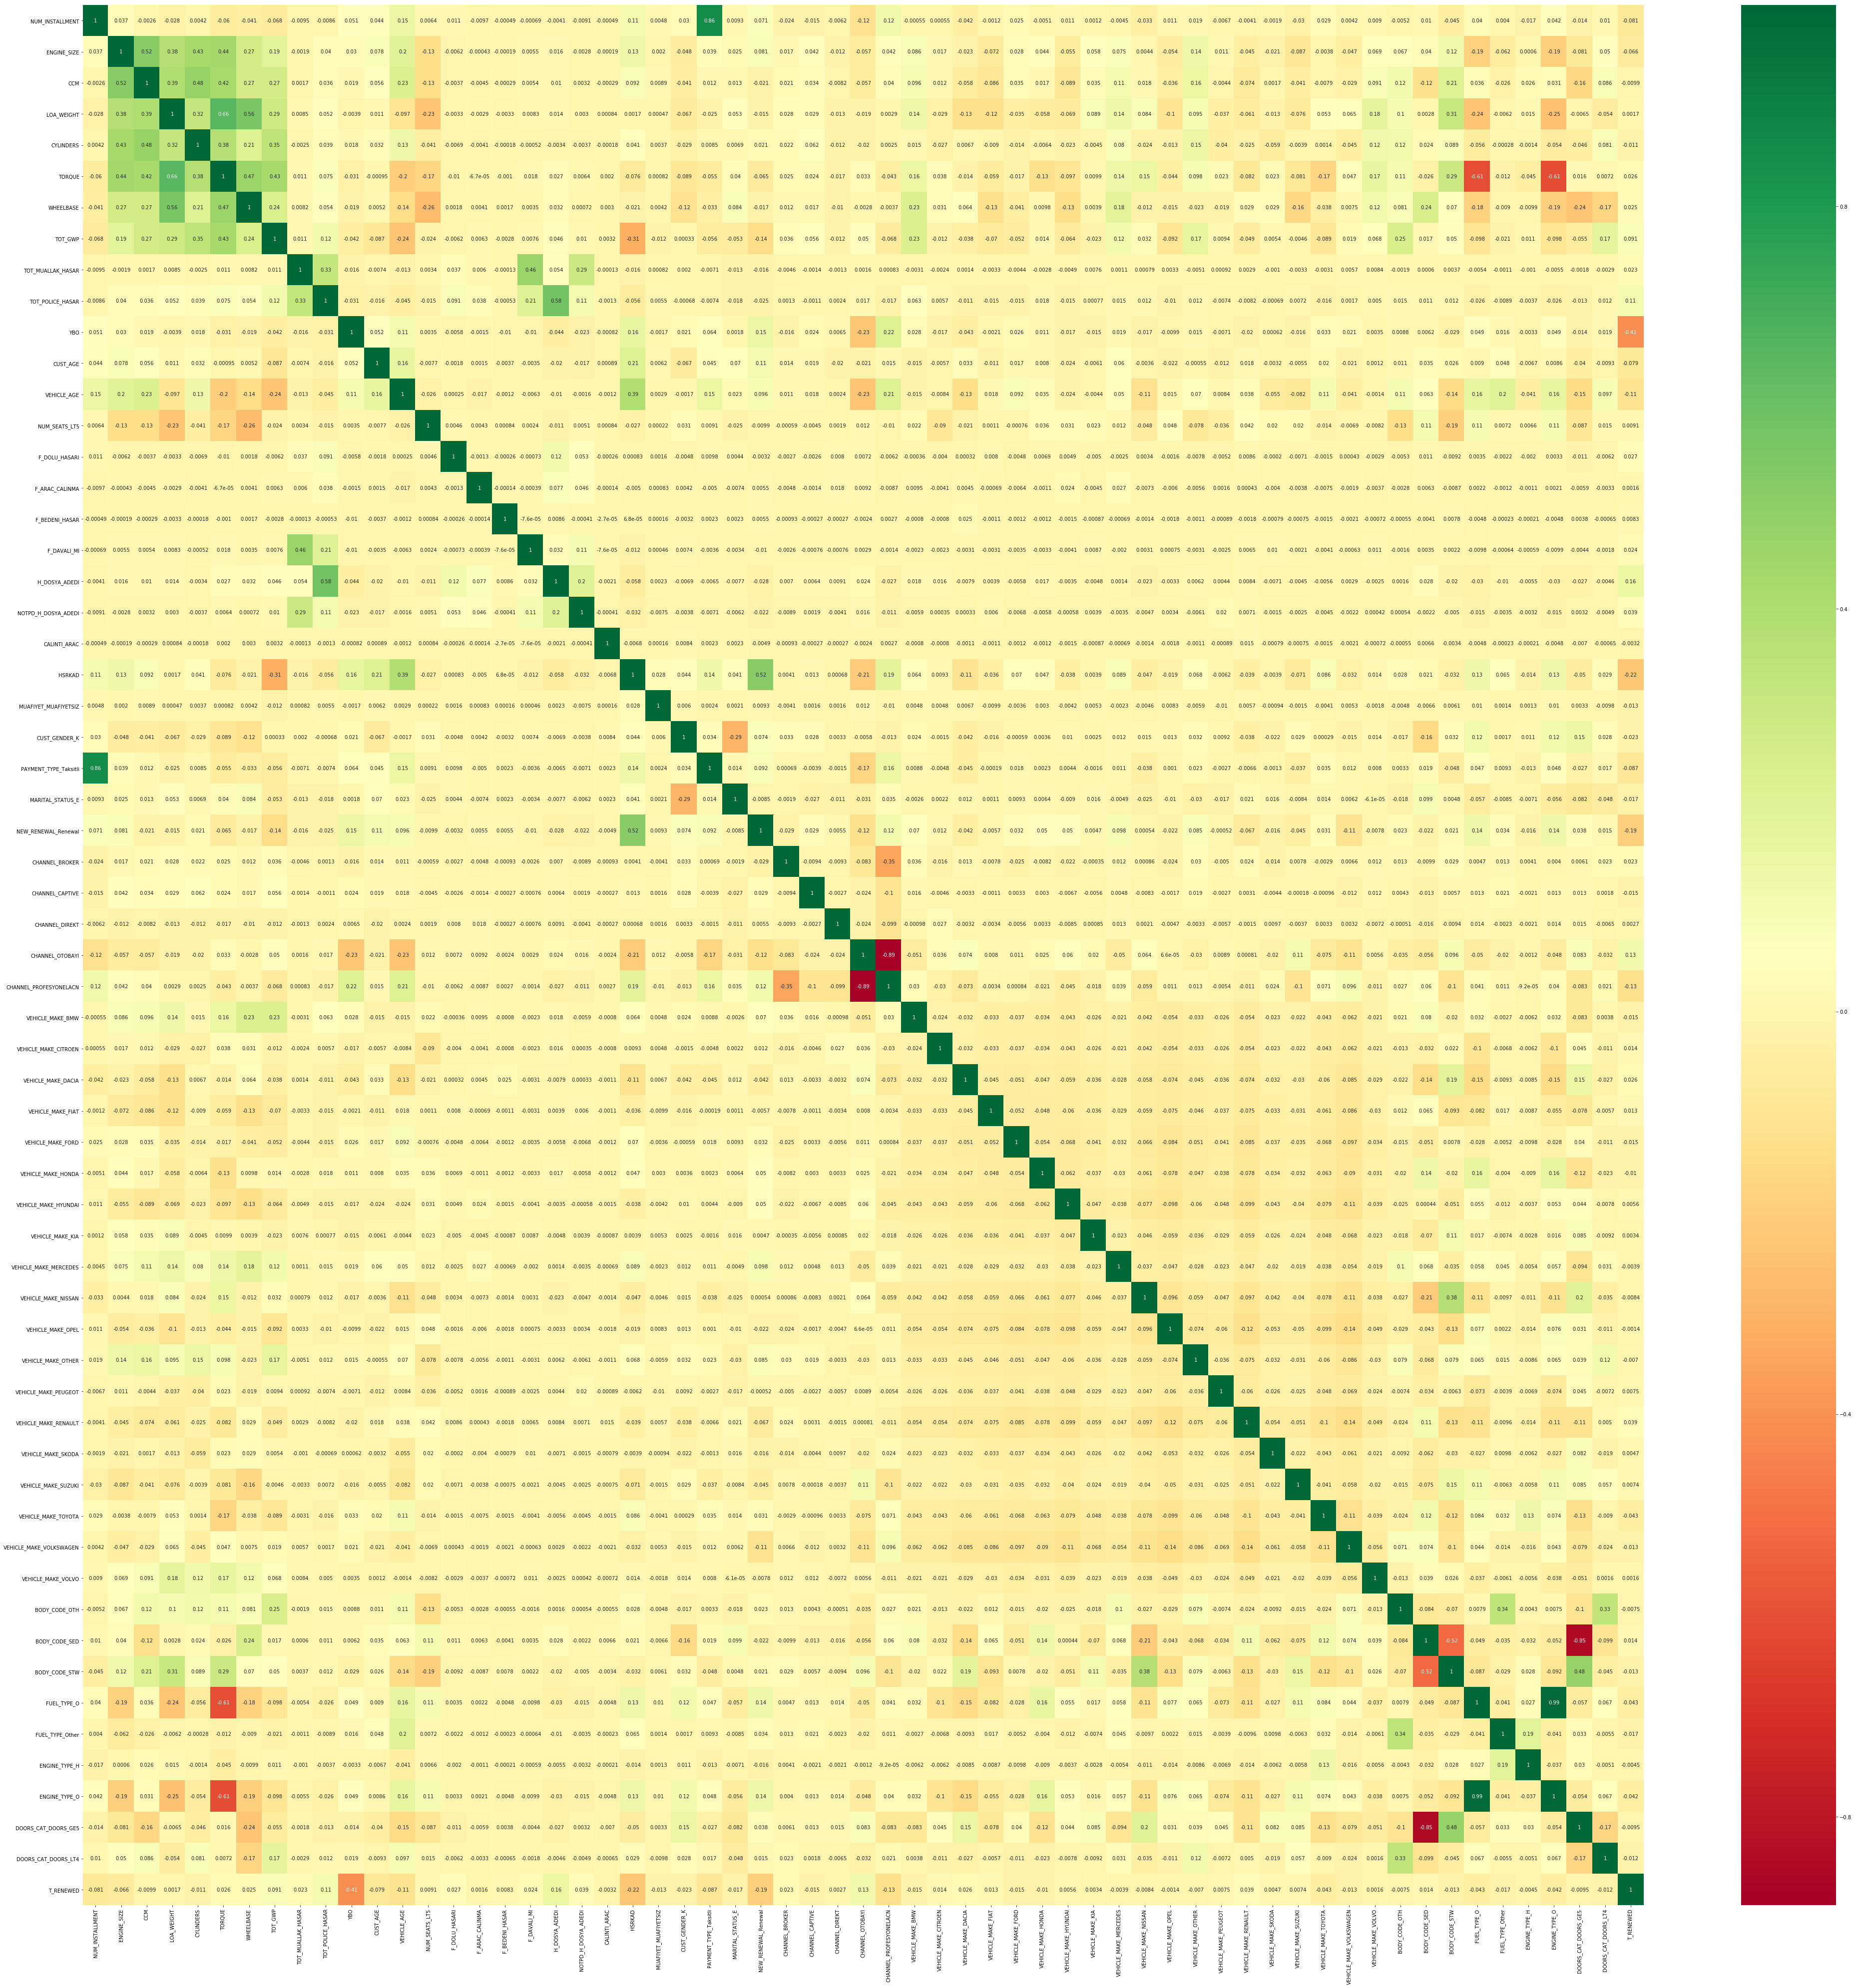

In [73]:
import seaborn as sns
%matplotlib inline

x=pd.concat([TRAIN_X, TRAIN_Y], axis=1,join_axes=[TRAIN_X.index])
#get correlations of each features in dataset
corrmat = x.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(70,70))
#plot heat map
g=sns.heatmap(x[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [74]:

TRAIN_X=TRAIN_X[['YBO',
'HSRKAD',
'TOT_GWP',
'VEHICLE_AGE',
'NEW_RENEWAL_Renewal',
'CUST_AGE',
'H_DOSYA_ADEDI',
'NUM_INSTALLMENT',
'CHANNEL_OTOBAYI',
'TOT_POLICE_HASAR',
'ENGINE_SIZE',
'TORQUE',
'WHEELBASE',
'CHANNEL_PROFESYONELACN',
'PAYMENT_TYPE_Taksitli',
'CUST_GENDER_K',
'FUEL_TYPE_O',
'ENGINE_TYPE_O',
'MARITAL_STATUS_E',
'VEHICLE_MAKE_RENAULT',
'VEHICLE_MAKE_TOYOTA',
'BODY_CODE_SED',
'BODY_CODE_STW',
'CCM',
'VEHICLE_MAKE_VOLKSWAGEN',
'CYLINDERS',
'VEHICLE_MAKE_DACIA',
'VEHICLE_MAKE_FORD',
'LOA_WEIGHT',
'NOTPD_H_DOSYA_ADEDI',
'VEHICLE_MAKE_FIAT',
'DOORS_CAT_DOORS_GE5'
]]


TEST_X=TEST_X[['YBO',
'HSRKAD',
'TOT_GWP',
'VEHICLE_AGE',
'NEW_RENEWAL_Renewal',
'CUST_AGE',
'H_DOSYA_ADEDI',
'NUM_INSTALLMENT',
'CHANNEL_OTOBAYI',
'TOT_POLICE_HASAR',
'ENGINE_SIZE',
'TORQUE',
'WHEELBASE',
'CHANNEL_PROFESYONELACN',
'PAYMENT_TYPE_Taksitli',
'CUST_GENDER_K',
'FUEL_TYPE_O',
'ENGINE_TYPE_O',
'MARITAL_STATUS_E',
'VEHICLE_MAKE_RENAULT',
'VEHICLE_MAKE_TOYOTA',
'BODY_CODE_SED',
'BODY_CODE_STW',
'CCM',
'VEHICLE_MAKE_VOLKSWAGEN',
'CYLINDERS',
'VEHICLE_MAKE_DACIA',
'VEHICLE_MAKE_FORD',
'LOA_WEIGHT',
'NOTPD_H_DOSYA_ADEDI',
'VEHICLE_MAKE_FIAT',
'DOORS_CAT_DOORS_GE5'
]]

In [75]:
print(TRAIN_X.shape)

print(TRAIN_Y.shape)

print(TEST_X.shape)

print(TEST_Y.shape)

(37250, 32)
(37250,)
(5088, 32)
(5088,)


In [76]:
TRAIN_X.dtypes

YBO                        float64
HSRKAD                       int64
TOT_GWP                    float64
VEHICLE_AGE                float64
NEW_RENEWAL_Renewal          uint8
CUST_AGE                   float64
H_DOSYA_ADEDI                int64
NUM_INSTALLMENT            float64
CHANNEL_OTOBAYI              uint8
TOT_POLICE_HASAR           float64
ENGINE_SIZE                float64
TORQUE                     float64
WHEELBASE                  float64
CHANNEL_PROFESYONELACN       uint8
PAYMENT_TYPE_Taksitli        uint8
CUST_GENDER_K                uint8
FUEL_TYPE_O                  uint8
ENGINE_TYPE_O                uint8
MARITAL_STATUS_E             uint8
VEHICLE_MAKE_RENAULT         uint8
VEHICLE_MAKE_TOYOTA          uint8
BODY_CODE_SED                uint8
BODY_CODE_STW                uint8
CCM                        float64
VEHICLE_MAKE_VOLKSWAGEN      uint8
CYLINDERS                  float64
VEHICLE_MAKE_DACIA           uint8
VEHICLE_MAKE_FORD            uint8
LOA_WEIGHT          

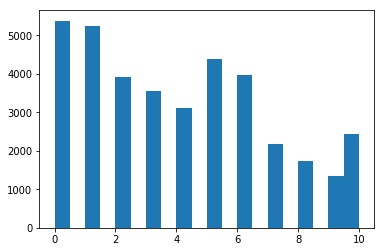

In [77]:
import matplotlib.pyplot as plt


%matplotlib inline

fig=plt.figure()

ax=fig.add_subplot(1,1,1)

ax.hist(TRAIN_X['HSRKAD'],bins=20)


plt.show()

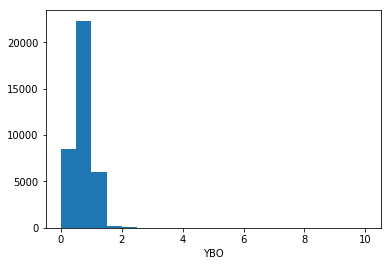

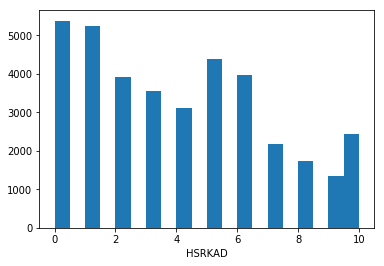

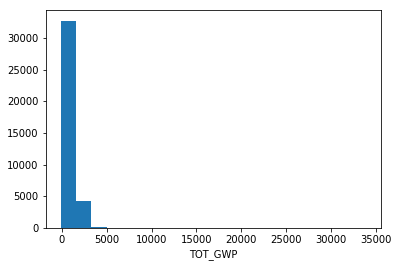

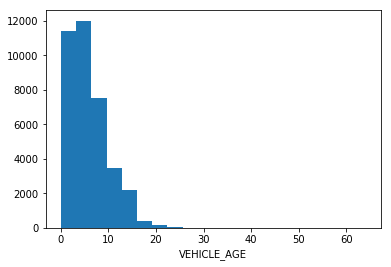

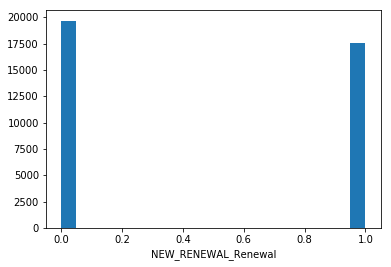

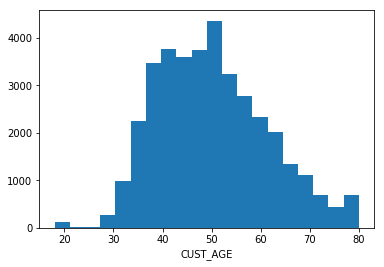

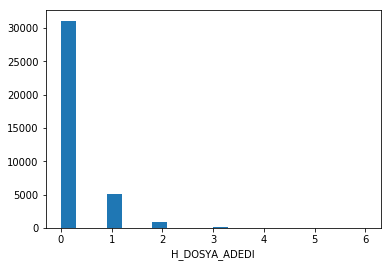

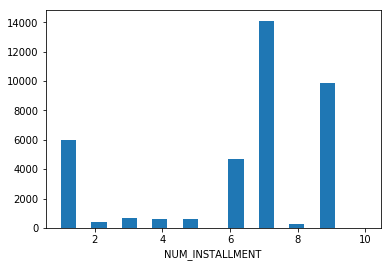

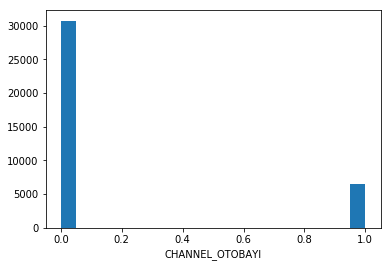

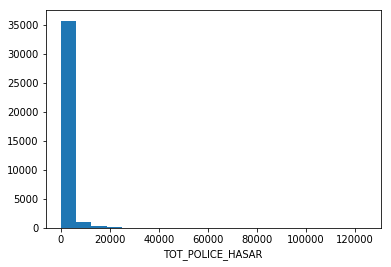

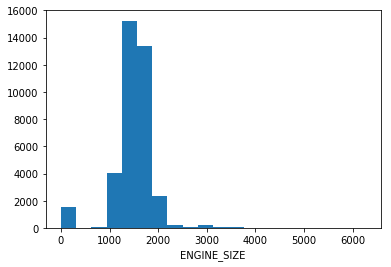

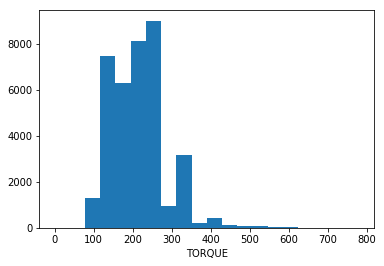

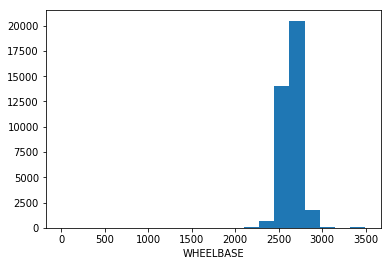

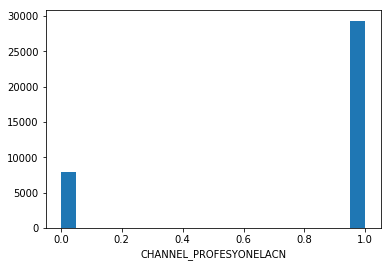

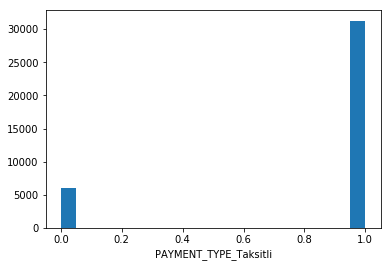

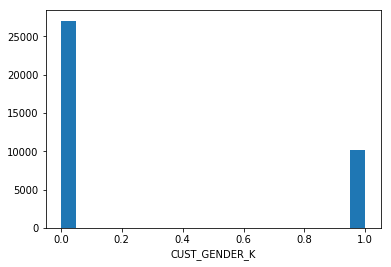

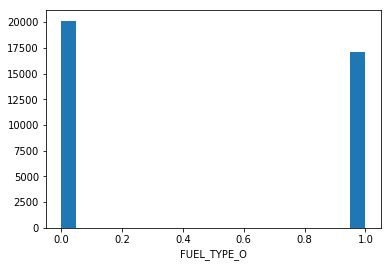

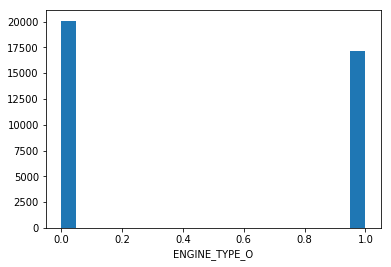

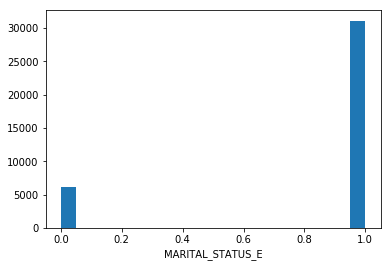

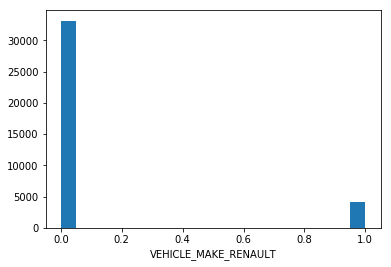

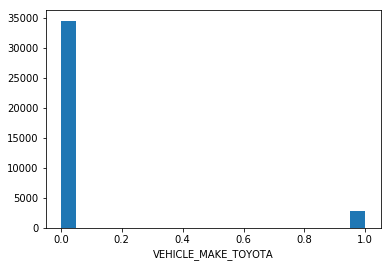

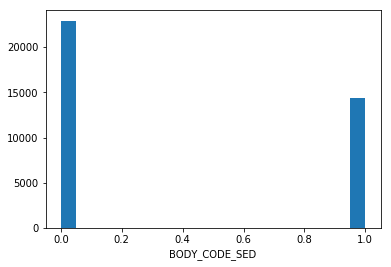

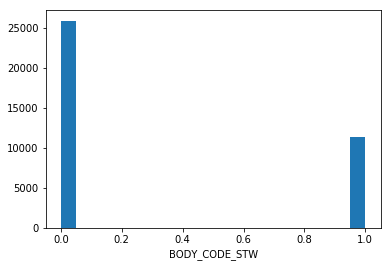

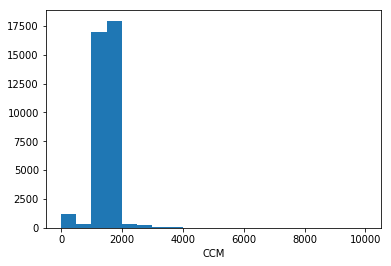

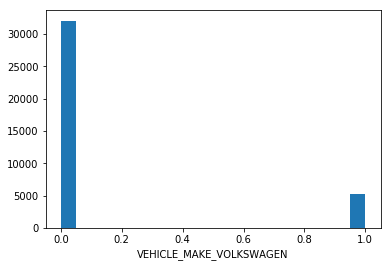

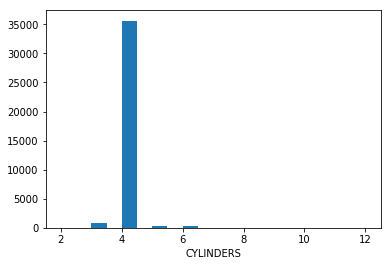

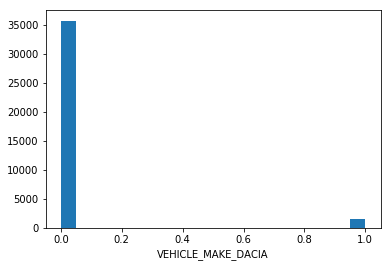

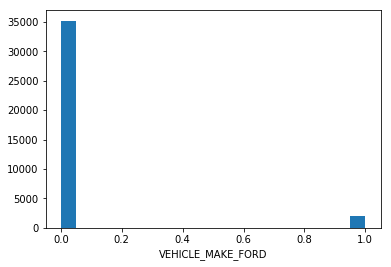

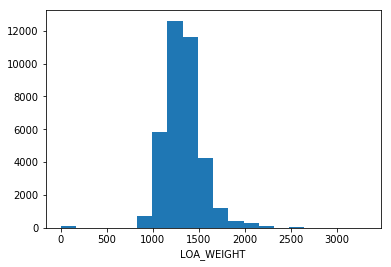

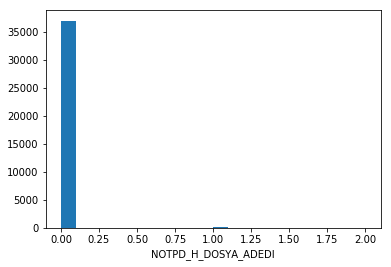

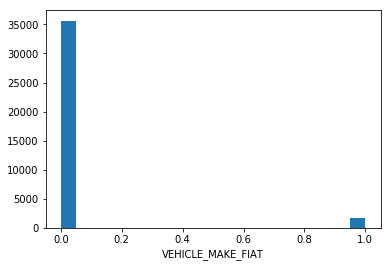

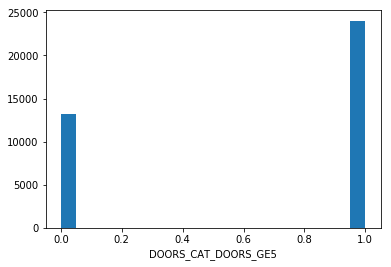

In [78]:
#con_data=pd.concat([TRAIN_X, TRAIN_Y], axis=1,join_axes=[TRAIN_X.index])
#sns.lmplot(x='ENGINE_SIZE',y='T_RENEWED',data=con_data ,scatter=True, fit_reg=False)
for i in list(TRAIN_X):
    %matplotlib inline
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.hist(TRAIN_X[i],bins=20)
    plt.xlabel(i)
    plt.show()

In [79]:

# import the class
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=5000)


from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix


In [80]:
cv_results = cross_validate(logreg, TRAIN_X, TRAIN_Y, cv=10, return_train_score=True )

cv_results

C:\Users\1001518\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\1001518\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


{'fit_time': array([11.86155701, 10.57870746, 13.49491072, 15.56564236, 17.87267852,
        18.29340029, 15.30191231, 12.69376326, 15.40602088, 10.17382169]),
 'score_time': array([0.00150418, 0.00250649, 0.00200462, 0.00250649, 0.00200415,
        0.00250697, 0.00250649, 0.00200558, 0.00201869, 0.00254011]),
 'test_score': array([0.79549114, 0.78234031, 0.79898014, 0.78019324, 0.78180354,
        0.78839957, 0.79027927, 0.78893663, 0.7867884 , 0.7773899 ]),
 'train_score': array([0.78674979, 0.78758501, 0.78573559, 0.78752535, 0.78701826,
        0.78741872, 0.78607648, 0.78747837, 0.78822406, 0.78816441])}

In [81]:
from sklearn.preprocessing import MinMaxScaler

names = TRAIN_X.columns

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(TRAIN_X)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=names)
X_train_scaled


X_test_scaled = scaler.transform(TEST_X)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=names)
cv_results_scaled = cross_validate(logreg, X_train_scaled, TRAIN_Y, cv=10, return_train_score=True )

print(cv_results)

print(cv_results_scaled)

C:\Users\1001518\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


{'fit_time': array([11.86155701, 10.57870746, 13.49491072, 15.56564236, 17.87267852,
       18.29340029, 15.30191231, 12.69376326, 15.40602088, 10.17382169]), 'score_time': array([0.00150418, 0.00250649, 0.00200462, 0.00250649, 0.00200415,
       0.00250697, 0.00250649, 0.00200558, 0.00201869, 0.00254011]), 'test_score': array([0.79549114, 0.78234031, 0.79898014, 0.78019324, 0.78180354,
       0.78839957, 0.79027927, 0.78893663, 0.7867884 , 0.7773899 ]), 'train_score': array([0.78674979, 0.78758501, 0.78573559, 0.78752535, 0.78701826,
       0.78741872, 0.78607648, 0.78747837, 0.78822406, 0.78816441])}
{'fit_time': array([0.56150603, 0.52641296, 0.51836514, 0.54646659, 0.58156037,
       0.63019252, 0.50786304, 0.66127586, 0.75502396, 0.75054097]), 'score_time': array([0.00252247, 0.00204849, 0.00150394, 0.00150394, 0.00200534,
       0.0020051 , 0.00150347, 0.00200653, 0.00200558, 0.00197816]), 'test_score': array([0.79388084, 0.77831455, 0.79656468, 0.77965647, 0.78019324,
       0.7

In [82]:
X_train_scaled.index = np.arange(1, len(X_train_scaled)+1)

X_train_scaled[['CUST_GENDER_K','FUEL_TYPE_O','ENGINE_TYPE_O']].head(n=21) 

,CUST_GENDER_K,FUEL_TYPE_O,ENGINE_TYPE_O
1,0.0,0.0,0.0
2,0.0,1.0,1.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,1.0,1.0
6,0.0,1.0,1.0
7,0.0,0.0,0.0
8,1.0,0.0,0.0
9,0.0,0.0,0.0
10,1.0,1.0,1.0


In [83]:
TRAIN_X[['CUST_GENDER_K','FUEL_TYPE_O','ENGINE_TYPE_O']].head(n=21) 

,CUST_GENDER_K,FUEL_TYPE_O,ENGINE_TYPE_O
6,0,0,0
11,0,1,1
17,0,0,0
29,0,0,0
31,0,1,1
35,0,1,1
38,0,0,0
47,1,0,0
51,0,0,0
53,1,1,1


In [84]:
#fir to train test
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix



logreg.fit(TRAIN_X, TRAIN_Y)


# calculate accuracy
print('Train accuracy')
print(metrics.accuracy_score(TRAIN_Y, logreg.predict(TRAIN_X)))
print('Test accuracy')
print(metrics.accuracy_score(TEST_Y, logreg.predict(TEST_X)))
print('Train recall')
print(recall_score(TRAIN_Y, logreg.predict(TRAIN_X)))
print('Test recall')
print(recall_score(TEST_Y, logreg.predict(TEST_X)))
print('Train conf matrix')
print(metrics.confusion_matrix(TRAIN_Y, logreg.predict(TRAIN_X)))
print('Test conf matrix')
print(metrics.confusion_matrix(TEST_Y, logreg.predict(TEST_X)))

Train accuracy
0.7879463087248322
Test accuracy
0.7698506289308176
Train recall
0.45544364508393287
Test recall
0.39622641509433965
Train conf matrix
[[24603  2222]
 [ 5677  4748]]
Test conf matrix
[[3329  275]
 [ 896  588]]


In [85]:
logreg.fit(X_train_scaled, TRAIN_Y)


# calculate accuracy
print('Train accuracy')
print(metrics.accuracy_score(TRAIN_Y, logreg.predict(X_train_scaled)))
print('Test accuracy')
print(metrics.accuracy_score(TEST_Y, logreg.predict(X_test_scaled)))
print('Train recall')
print(recall_score(TRAIN_Y, logreg.predict(X_train_scaled)))
print('Test recall')
print(recall_score(TEST_Y, logreg.predict(X_test_scaled)))
print('Train conf matrix')
print(metrics.confusion_matrix(TRAIN_Y, logreg.predict(X_train_scaled)))
print('Test conf matrix')
print(metrics.confusion_matrix(TEST_Y, logreg.predict(X_test_scaled)))

Train accuracy
0.7863087248322148
Test accuracy
0.7669025157232704
Train recall
0.41918465227817747
Test recall
0.3557951482479784
Train conf matrix
[[24920  1905]
 [ 6055  4370]]
Test conf matrix
[[3374  230]
 [ 956  528]]


In [86]:

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

In [155]:
sm = SMOTE(random_state=12,ratio={1:90000})
x_train_sm, y_train_sm = sm.fit_sample(TRAIN_X, TRAIN_Y.values.ravel())

x_train_sm_n, y_train_sm_n = sm.fit_sample(X_train_scaled, TRAIN_Y.values.ravel())

C:\Users\1001518\AppData\Local\Continuum\anaconda3\lib\site-packages\imbalanced_learn-0.5.0-py3.7.egg\imblearn\utils\_validation.py:253: UserWarning: After over-sampling, the number of samples (90000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 26825)
  n_samples_majority))
C:\Users\1001518\AppData\Local\Continuum\anaconda3\lib\site-packages\imbalanced_learn-0.5.0-py3.7.egg\imblearn\utils\_validation.py:253: UserWarning: After over-sampling, the number of samples (90000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 26825)
  n_samples_majority))


In [156]:
y_train_sm.sum()

90000

In [157]:
print(TRAIN_Y.sum())

print(len(TRAIN_Y))

print(TRAIN_Y.sum()/len(TRAIN_Y))

10425
37250
0.27986577181208055


In [158]:
print(y_train_sm.sum())

print(len(y_train_sm))

print(y_train_sm.sum()/len(y_train_sm))

90000
116825
0.7703830515728654


In [159]:
logreg.fit(x_train_sm, y_train_sm)


# calculate accuracy
# calculate accuracy
print('Train accuracy')
print(metrics.accuracy_score(TRAIN_Y, logreg.predict(TRAIN_X)))
print('Test accuracy')
print(metrics.accuracy_score(TEST_Y, logreg.predict(TEST_X)))
print('Train recall')
print(recall_score(TRAIN_Y, logreg.predict(TRAIN_X)))
print('Test recall')
print(recall_score(TEST_Y, logreg.predict(TEST_X)))
print('Train conf matrix')
print(metrics.confusion_matrix(TRAIN_Y, logreg.predict(TRAIN_X)))
print('Test conf matrix')
print(metrics.confusion_matrix(TEST_Y, logreg.predict(TEST_X)))

Train accuracy
0.556510067114094
Test accuracy
0.5735062893081762
Train recall
0.925947242206235
Test recall
0.8915094339622641
Train conf matrix
[[11077 15748]
 [  772  9653]]
Test conf matrix
[[1595 2009]
 [ 161 1323]]


In [161]:
logreg.fit(x_train_sm_n, y_train_sm_n)


# calculate accuracy
print('Train accuracy')
print(metrics.accuracy_score(TRAIN_Y, logreg.predict(X_train_scaled)))
print('Test accuracy')
print(metrics.accuracy_score(TEST_Y, logreg.predict(X_test_scaled)))
print('Train recall')
print(recall_score(TRAIN_Y, logreg.predict(X_train_scaled)))
print('Test recall')
print(recall_score(TEST_Y, logreg.predict(X_test_scaled)))
print('Train conf matrix')
print(metrics.confusion_matrix(TRAIN_Y, logreg.predict(X_train_scaled)))
print('Test conf matrix')
print(metrics.confusion_matrix(TEST_Y, logreg.predict(X_test_scaled)))

Train accuracy
0.5418523489932886
Test accuracy
0.5562106918238994
Train recall
0.9340047961630695
Test recall
0.9056603773584906
Train conf matrix
[[10447 16378]
 [  688  9737]]
Test conf matrix
[[1486 2118]
 [ 140 1344]]


In [171]:
logreg.fit(x_train_sm_n, y_train_sm_n)

cv_results_scaled_smote = cross_validate(logreg, x_train_sm_n, y_train_sm_n, cv=10, return_train_score=True, scoring='recall')


print(cv_results_scaled_smote)

{'fit_time': array([3.02409911, 2.89761019, 3.37288284, 3.40795279, 2.60042167,
       2.63693881, 3.07207155, 3.12576246, 2.59740996, 2.70892429]), 'score_time': array([0.00351   , 0.00351048, 0.00404215, 0.00451159, 0.00400949,
       0.00353909, 0.00350881, 0.00350857, 0.00400996, 0.00300789]), 'test_score': array([0.93188889, 0.951     , 0.95677778, 0.95822222, 0.95911111,
       0.96044444, 0.96211111, 0.95611111, 0.96066667, 0.96211111]), 'train_score': array([0.95717284, 0.95637037, 0.95602469, 0.9558642 , 0.9552716 ,
       0.95669136, 0.95583951, 0.95607407, 0.95606173, 0.95545679])}


In [168]:
len(x_train_sm_n)

116825

In [169]:
len(X_train_scaled)

37250

In [170]:
len(TRAIN_Y)

37250

In [177]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
#x_train_sub, x_val_sub, y_train_sub, y_val_sub

In [178]:
#smote works better
# fit model no training data
gbc = XGBClassifier(random_state=12,max_depth=7,n_estimators=100,base_score=0.4)
gbc.fit(x_train_sm_n, y_train_sm_n)

# calculate accuracy
# calculate accuracy
print('Train accuracy')
print(metrics.accuracy_score(TRAIN_Y, gbc.predict(X_train_scaled.values)))
print('Test accuracy')
print(metrics.accuracy_score(TEST_Y, gbc.predict(X_test_scaled.values)))
print('Train recall')
print(recall_score(TRAIN_Y, gbc.predict(X_train_scaled.values)))
print('Test recall')
print(recall_score(TEST_Y, gbc.predict(X_test_scaled.values)))
print('Train conf matrix')
print(metrics.confusion_matrix(TRAIN_Y, gbc.predict(X_train_scaled.values)))
print('Test conf matrix')
print(metrics.confusion_matrix(TEST_Y, gbc.predict(X_test_scaled.values)))

Train accuracy
0.8073020134228188
Test accuracy
0.7582547169811321
Train recall
0.6330935251798561
Test recall
0.543800539083558
Train conf matrix
[[23472  3353]
 [ 3825  6600]]
Test conf matrix
[[3051  553]
 [ 677  807]]


In [180]:
# fit model no training data
gbc = XGBClassifier(random_state=12,max_depth=7,n_estimators=100,base_score=0.4)
gbc.fit(X_train_scaled.values, TRAIN_Y)


# calculate accuracy
# calculate accuracy
print('Train accuracy')
print(metrics.accuracy_score(TRAIN_Y, gbc.predict(X_train_scaled.values)))
print('Test accuracy')
print(metrics.accuracy_score(TEST_Y, gbc.predict(X_test_scaled.values)))
print('Train recall')
print(recall_score(TRAIN_Y, gbc.predict(X_train_scaled.values)))
print('Test recall')
print(recall_score(TEST_Y, gbc.predict(X_test_scaled.values)))
print('Train conf matrix')
print(metrics.confusion_matrix(TRAIN_Y, gbc.predict(X_train_scaled.values)))
print('Test conf matrix')
print(metrics.confusion_matrix(TEST_Y, gbc.predict(X_test_scaled.values)))

Train accuracy
0.8354362416107383
Test accuracy
0.7729952830188679
Train recall
0.5623980815347722
Test recall
0.4272237196765499
Train conf matrix
[[25257  1568]
 [ 4562  5863]]
Test conf matrix
[[3299  305]
 [ 850  634]]


In [182]:
logreg.fit(x_train_sm_n, y_train_sm_n)


# calculate accuracy
print('Train accuracy')
print(metrics.accuracy_score(TRAIN_Y, logreg.predict(X_train_scaled)))
print('Test accuracy')
print(metrics.accuracy_score(TEST_Y, logreg.predict(X_test_scaled)))
print('Train recall')
print(recall_score(TRAIN_Y, logreg.predict(X_train_scaled)))
print('Test recall')
print(recall_score(TEST_Y, logreg.predict(X_test_scaled)))
print('Train conf matrix')
print(metrics.confusion_matrix(TRAIN_Y, logreg.predict(X_train_scaled)))
print('Test conf matrix')
print(metrics.confusion_matrix(TEST_Y, logreg.predict(X_test_scaled)))

Train accuracy
0.5418523489932886
Test accuracy
0.5562106918238994
Train recall
0.9340047961630695
Test recall
0.9056603773584906
Train conf matrix
[[10447 16378]
 [  688  9737]]
Test conf matrix
[[1486 2118]
 [ 140 1344]]


In [190]:
logreg.fit(x_train_sm_n, y_train_sm_n)

from sklearn.preprocessing import binarize
y_train_prob = logreg.predict_proba(X_train_scaled)[:, 1]
y_train_class = binarize([y_train_prob], 0.70)[0]


print(metrics.accuracy_score(TRAIN_Y, y_train_class))

print(recall_score(TRAIN_Y,y_train_class))

print(metrics.confusion_matrix(TRAIN_Y, y_train_class))



y_test_prob = logreg.predict_proba(X_test_scaled)[:, 1]
y_test_class = binarize([y_test_prob], 0.70)[0]


print(metrics.accuracy_score(TEST_Y, y_test_class))

print(recall_score(TEST_Y,y_test_class))

print(metrics.confusion_matrix(TEST_Y,y_test_class))



0.7033557046979866
0.7961630695443646
[[17900  8925]
 [ 2125  8300]]
0.7104952830188679
0.7533692722371967
[[2497 1107]
 [ 366 1118]]
